In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats

In [2]:
df = pd.read_csv("Raw Data.csv") # The name of participants have been removed right after the experiment.
df = df.apply(pd.to_numeric, errors='coerce')

In [3]:
df.isnull().sum()

age              6
gender           6
SPS              6
FA1              6
FA2              6
FA3              6
FA4              6
RAT              6
BT               6
CSE              6
Group            6
Stage1           0
Stage2           0
Num              6
Stage2_Stage1    6
dtype: int64

In [4]:
df.describe()

,age,gender,SPS,FA1,FA2,FA3,FA4,RAT,BT,CSE,Group,Stage1,Stage2,Num,Stage2_Stage1
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,209.000000,209.000000,203.000000,203.000000
mean,19.901478,1.773399,101.049261,5.201970,8.285714,12.142857,9.192118,6.078818,4.901478,27.162562,0.507389,13.474078,21.335145,108.931034,7.847291
std,1.210575,0.419667,11.640980,3.329079,4.915841,6.703353,4.110785,2.247924,2.036826,6.612183,0.501181,7.127480,9.630582,62.101683,8.050050
min,18.000000,1.000000,65.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,7.000000,0.000000,3.000000,5.000000,1.000000,-17.000000
25%,19.000000,2.000000,94.000000,3.000000,5.000000,7.000000,6.000000,5.000000,3.000000,23.000000,0.000000,8.000000,14.000000,55.500000,2.000000
50%,20.000000,2.000000,102.000000,4.000000,7.000000,11.000000,9.000000,6.000000,5.000000,28.000000,1.000000,12.000000,19.000000,109.000000,7.000000
75%,21.000000,2.000000,109.000000,7.000000,11.000000,15.500000,11.500000,8.000000,6.000000,32.000000,1.000000,17.000000,28.000000,161.500000,13.000000
max,22.000000,2.000000,128.000000,18.000000,23.000000,34.000000,22.000000,11.000000,10.000000,42.000000,1.000000,37.000000,49.000000,216.000000,35.000000


**FA** stands for Free-association (FA1 and FA2 are for stage 1, FA3 and FA4 are for stage 2);<br>
**RAT** stands for Remote association test, BT stands for Brain teaser;<br>
**CSE** stands for Creativity self-efficacy.

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

age              0
gender           0
SPS              0
FA1              0
FA2              0
FA3              0
FA4              0
RAT              0
BT               0
CSE              0
Group            0
Stage1           0
Stage2           0
Num              0
Stage2_Stage1    0
dtype: int64

In [6]:
for value in df['gender'].unique():
    print(f"value: {repr(value)} - type: {type(value)}")

value: np.float64(1.0) - type: <class 'numpy.float64'>
value: np.float64(2.0) - type: <class 'numpy.float64'>


There is more female(77%) participants than male(23%),which is mainly because of the gender unbalance on campus.

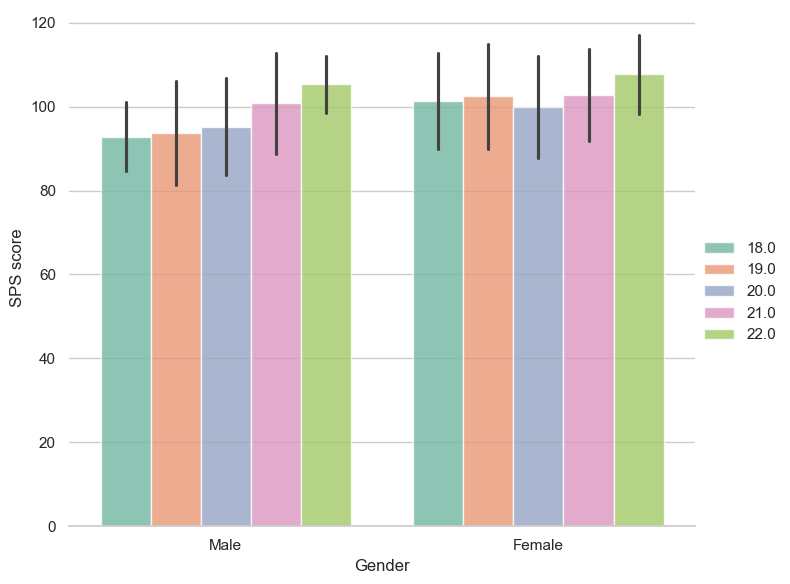

In [7]:
# Based on participants' age and gender, displaying their SPS score.
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=df, kind="bar",
    x="gender", y="SPS", hue="age",
    errorbar="sd",
    palette="Set2", alpha=.8, height=6, aspect=1.2
)
g.despine(left=True)
g.set_axis_labels("Gender")
g.set_xticklabels(["Male", "Female"])
g.set_ylabels("SPS score")
g.legend.set_title("")

There is an interesting distribution of SPS score when considering participants' age.

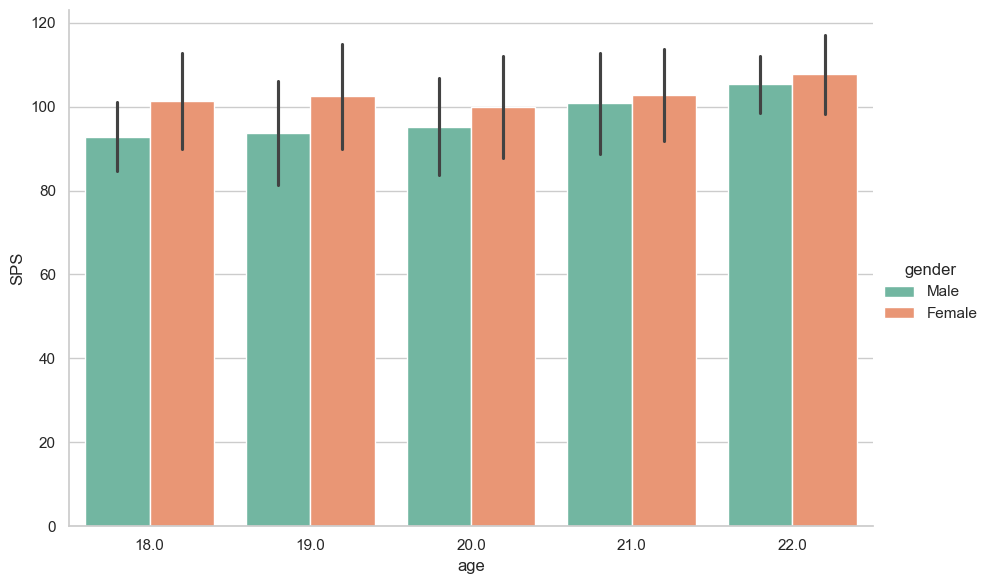

In [8]:
# Is there any significance when considering gender and age? Do some analysis first.
df2 = df.copy()
df2["gender"] = df2["gender"].map({1.0: "Male", 2.0: "Female"})

sns.catplot(
    data=df2, kind="bar",
    x="age", y="SPS", hue="gender",
    errorbar="sd", palette="Set2", height=6, aspect=1.5
)

From the table above there is a slight difference of SPS level between male and femal participants.

In [9]:
model = ols("SPS ~ C(gender) * C(age)", data=df).fit()
# ANOVA Table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                        sum_sq     df         F    PR(>F)
C(gender)           785.965036    1.0  5.999021  0.015206
C(age)             1174.254304    4.0  2.240677  0.066138
C(gender):C(age)    252.967247    4.0  0.482705  0.748422
Residual          25286.002625  193.0       NaN       NaN


The two-way ANOVA revealed a significant main effect of gender on SPS (p = 0.015), with differences in scores between males and females; the age effect was marginally significant (p = 0.066); and the interaction between gender and age was not significant (p = 0.748).

In [10]:
# Tukey HSD post hoc test
tukey = pairwise_tukeyhsd(
    endog=df["SPS"], 
    groups=df["age"], 
    alpha=0.05       
)
# Result
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  18.0   19.0   2.6744 0.8541 -4.6722  10.021  False
  18.0   20.0  -0.1636    1.0 -7.1536  6.8263  False
  18.0   21.0   3.2545 0.7027 -3.7354 10.2445  False
  18.0   22.0   7.7059   0.17 -1.7712 17.1829  False
  19.0   20.0  -2.8381 0.7461 -9.3001  3.6239  False
  19.0   21.0   0.5801 0.9992 -5.8819  7.0421  False
  19.0   22.0   5.0315 0.5487 -4.0632 14.1261  False
  20.0   21.0   3.4182 0.5284 -2.6353  9.4716  False
  20.0   22.0   7.8695 0.1043 -0.9396 16.6786  False
  21.0   22.0   4.4513 0.6341 -4.3577 13.2604  False
----------------------------------------------------


There is no statistically significant age difference in SPS between 18-22 years old.

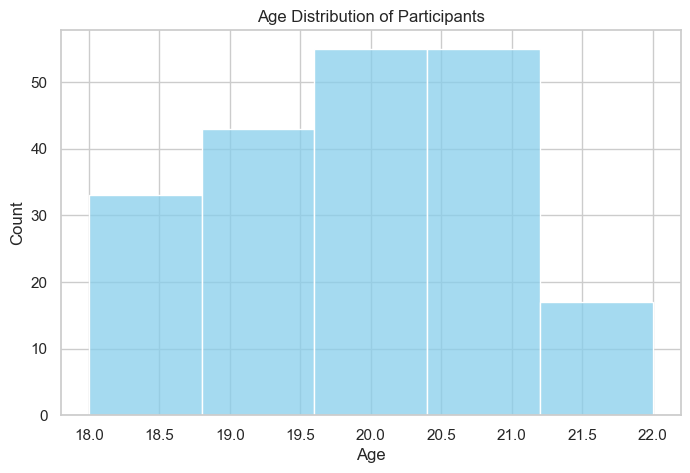

In [11]:
# Show age distribution of participants.
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8,5))
sns.histplot(df["age"], bins=5, kde=False, color="skyblue")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Participants")
plt.show()

The age distribution of participants is relatively balanced.

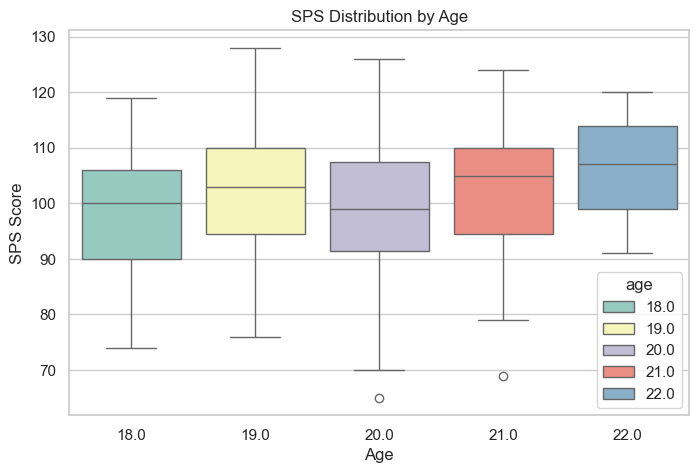

In [12]:
# Show SPS distribution by age.
plt.figure(figsize=(8,5))
sns.boxplot(x="age", y="SPS", hue = "age", data=df, palette="Set3")
plt.xlabel("Age")
plt.ylabel("SPS Score")
plt.title("SPS Distribution by Age")
plt.show()

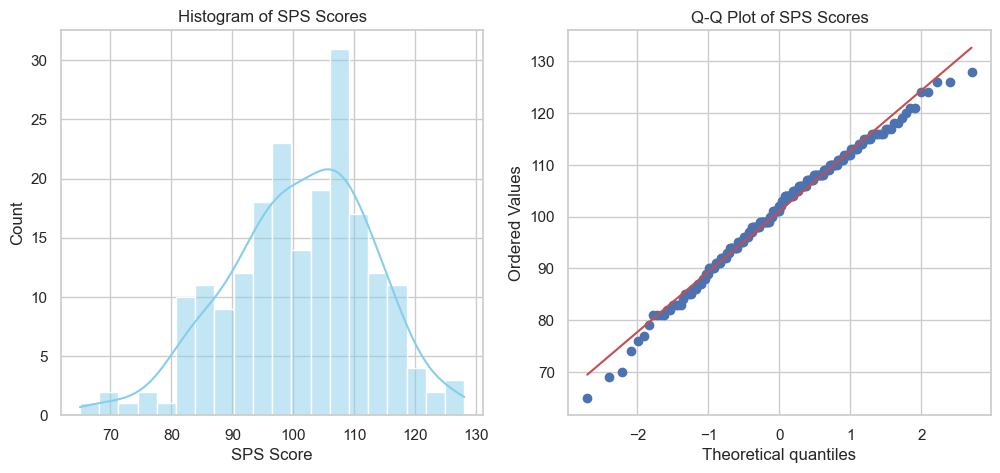

In [13]:
# Show distribution o SPS scores and Q-Q Plot.
sps = df["SPS"].dropna()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(sps, bins=20, kde=True, color="skyblue")
plt.xlabel("SPS Score")
plt.ylabel("Count")
plt.title("Histogram of SPS Scores")

plt.subplot(1,2,2)
stats.probplot(sps, dist="norm", plot=plt)
plt.title("Q-Q Plot of SPS Scores")

plt.show()

In [14]:
# Shapiro-Wilk Normality Test.
shapiro_test = stats.shapiro(sps)
print("Shapiro-Wilk Test for Small Sample:")
print(f"Statistic = {shapiro_test.statistic:.4f}, p-value = {shapiro_test.pvalue:.4f}")

# Result
if shapiro_test.pvalue > 0.05:
    print("Conclusion: The data is approximately normally distributed(p > 0.05)")
else:
    print("Conclusion: The data deviates significantly from the normal distribution(p <= 0.05)")

Shapiro-Wilk Test for Small Sample:
Statistic = 0.9893, p-value = 0.1355
Conclusion: The data is approximately normally distributed(p > 0.05)


The SPS value can be seen as normally distributed.

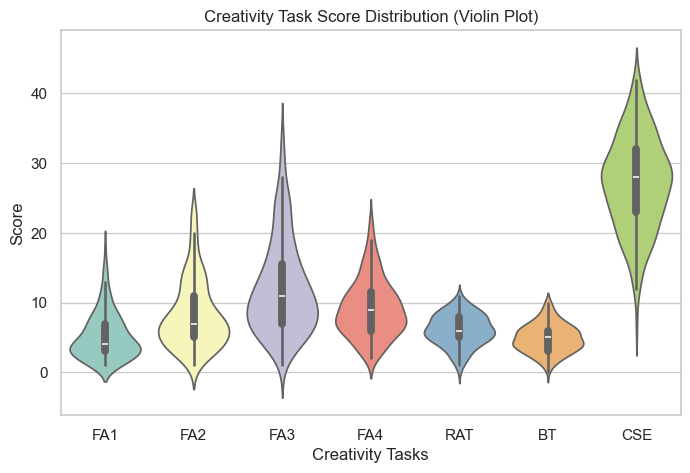

In [15]:
plt.figure(figsize=(8,5))
tasks = ["FA1", "FA2", "FA3", "FA4", "RAT", "BT", "CSE"]
sns.violinplot(data=df[tasks], palette="Set3")
plt.xlabel("Creativity Tasks")
plt.ylabel("Score")
plt.title("Creativity Task Score Distribution (Violin Plot)")
plt.show()

In [16]:
df[tasks].describe()

,FA1,FA2,FA3,FA4,RAT,BT,CSE
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,5.201970,8.285714,12.142857,9.192118,6.078818,4.901478,27.162562
std,3.329079,4.915841,6.703353,4.110785,2.247924,2.036826,6.612183
min,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,7.000000
25%,3.000000,5.000000,7.000000,6.000000,5.000000,3.000000,23.000000
50%,4.000000,7.000000,11.000000,9.000000,6.000000,5.000000,28.000000
75%,7.000000,11.000000,15.500000,11.500000,8.000000,6.000000,32.000000
max,18.000000,23.000000,34.000000,22.000000,11.000000,10.000000,42.000000


Descriptive data of tasks.

In [17]:
df[tasks].corr()

,FA1,FA2,FA3,FA4,RAT,BT,CSE
FA1,1.000000,0.518876,0.509368,0.368299,-0.000815,0.146775,0.126241
FA2,0.518876,1.000000,0.474085,0.464932,0.072767,0.054245,-0.035704
FA3,0.509368,0.474085,1.000000,0.609456,0.032431,0.180875,0.093851
FA4,0.368299,0.464932,0.609456,1.000000,0.052462,0.177873,0.055670
RAT,-0.000815,0.072767,0.032431,0.052462,1.000000,0.092527,-0.174390
BT,0.146775,0.054245,0.180875,0.177873,0.092527,1.000000,0.054126
CSE,0.126241,-0.035704,0.093851,0.055670,-0.174390,0.054126,1.000000


For the similar questions from FA1 to FA4, there is a generally strong correlation between them (r is closed to 0.5).<br>
Interestingly, there is a negative relationship between RAT and CSE socres.

In [18]:
sps = pd.read_csv("SPS Data.CSV")
sps.describe()

,Num,Age,gender,SPS1,SPS2,SPS3,SPS4,SPS5,SPS6,SPS7,...,SPS18,SPS19,SPS20,SPS21,SPS22,SPS23,SPS24,SPS25,SPS26,SPS27
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,132.500000,2.984848,1.768939,3.481061,3.742424,3.708333,3.246212,4.037879,2.928030,3.515152,...,2.829545,3.541667,3.545455,3.481061,4.045455,3.662879,3.325758,4.064394,3.643939,3.507576
std,76.354437,1.384240,0.422312,0.926799,0.948252,1.110855,1.142002,1.179065,1.266162,1.248481,...,1.453107,1.095344,1.244691,1.035318,0.989401,0.988520,1.113322,0.930892,1.141226,1.308040
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,66.750000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.750000,2.000000,3.000000,...,1.750000,3.000000,3.000000,3.000000,4.000000,3.000000,2.000000,4.000000,3.000000,2.000000
50%,132.500000,3.000000,2.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000
75%,198.250000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,...,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000
max,264.000000,8.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [19]:
dt_items = df.filter(like="FA")
sps_items = sps.filter(like="SPS")

# Define Cronbach’s Alpha Function
def cronbach_alpha(df_items):
    item_scores = df_items.dropna()
    k = item_scores.shape[1]
    variances = item_scores.var(axis=0, ddof=1)
    total_var = item_scores.sum(axis=1).var(ddof=1)
    alpha = (k / (k - 1)) * (1 - variances.sum() / total_var)
    return alpha

# Calculate
alpha_dt = cronbach_alpha(dt_items)
alpha_sps = cronbach_alpha(sps_items)

print(f"Cronbach's Alpha for DT tasks: {alpha_dt:.3f}")
print(f"Cronbach's Alpha for SPS scale: {alpha_sps:.3f}")

Cronbach's Alpha for DT tasks: 0.772
Cronbach's Alpha for SPS scale: 0.820


As shown above, there is a satisfied Cronbach's Alpha for DT (Divergent Thinking, or Free Association, FA with another word) and SPS items.

The second file **"02_Statistical_Analysis.ipynb"** is going to show statistical analysis between Group 0 (Game Group or Control Group) and Group 1 (Exam Group or Experiment Group);